<a href="https://colab.research.google.com/github/li-hao-/ColabPlayground/blob/main/PiWavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#!pip install "git+https://github.com/aaren/wavelets"

In [27]:
from mpmath import mp
mp.dps = 20000  # set number of digits
pi = str(mp.pi)
pi = "3" + pi[2:]
pi

'314159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

In [28]:
sst = [int(c) for c in list(pi)]
time = list(range(0, len(sst)))

In [29]:
import numpy as np
import pywt

# time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 256)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
#levels = [v/365 for v in levels]

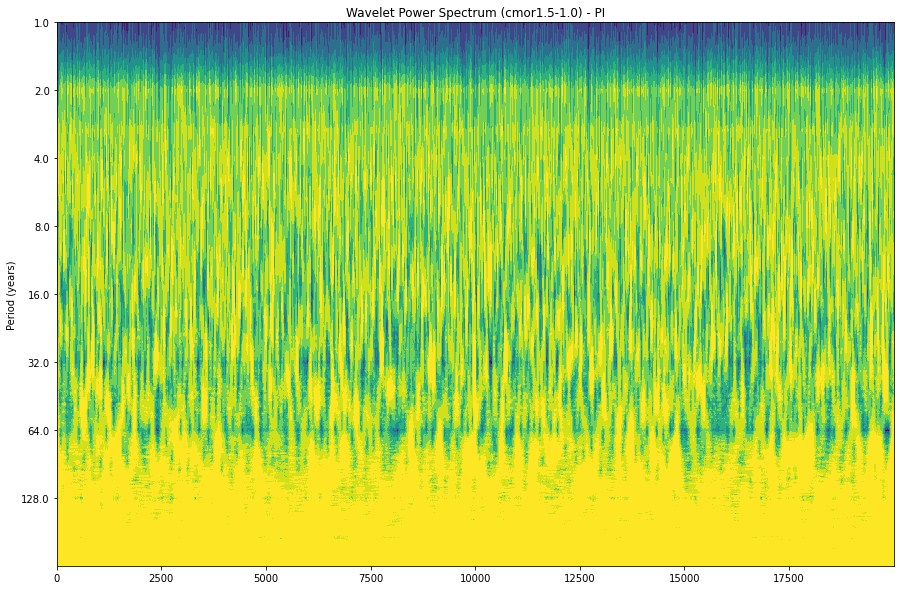

In [32]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, sharex=True, figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('Wavelet Power Spectrum (%s) - PI' % (wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()

plt.show()